In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import warnings

In [2]:
#Find the path to the files 
fashion_mnist = Path("C:\\Users\\jackl\\Desktop\\fashion-mnist\\utils")

In [3]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
# Change directory to fashion mnist
os.chdir(fashion_mnist)
import mnist_reader
#Load the fashion mnist data
X_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

# Global Arrays & Temp Arrays
#######################################
# tmp variables used to filter for results that are sandals and sneakers
index_of_x_train_5 = []
index_of_x_train_7 = []
index_x_test_5 = []
index_x_test_7 = []
# Sandals and sneakers img data
X_train_5_7 = []
X_test_5_7 = []
# Training pre-processing
#######################################
# Sandals and sneakers outputs (Converted to 0 and 1)
y_train_5_7 = []
# creating the y_train_5_7 list
for z in range(0,12000):
    if(z < 6000):
        y_train_5_7.append(0)
    else:
        y_train_5_7.append(1)


for i in range(0,len(y_train)):
    if(y_train[i] == 5):
        index_of_x_train_5.append(i)
        
for i in range(0,len(y_train)):
    if(y_train[i] == 7):
        index_of_x_train_7.append(i)
        
        
for j in range(0,6000):
    X_train_5_7.append(X_train[index_of_x_train_5[j]])
for k in range(0,6000):
    X_train_5_7.append(X_train[index_of_x_train_7[k]])
    

X_train_5_7 = np.array(X_train_5_7)
X_train_5_7 = X_train_5_7.astype(np.float)
for i in range(0,len(X_train_5_7)):
    for j in range(0,784):
        X_train_5_7[i][j] = X_train_5_7[i][j] / 255
#print(X_train_5_7[0])
y_train_5_7 = np.array(y_train_5_7)
y_train_5_7 = y_train_5_7.astype(np.float)
# Test pre - processing 
#########################################
y_test_5_7 = []

for z in range(0,2000):
    if (z < 1000):
        y_test_5_7.append(0)
    else:
        y_test_5_7.append(1)

for i in range(0,len(y_test)):
    if(y_test[i] == 5):
        index_x_test_5.append(i)
for i in range(0,len(y_test)):
    if(y_test[i] == 7):
        index_x_test_7.append(i)

for j in range(0,1000):
    X_test_5_7.append(X_test[index_x_test_5[j]])
for j in range(0,1000):
    X_test_5_7.append(X_test[index_x_test_7[j]])
    
X_test_5_7 = np.array(X_test_5_7)
X_test_5_7 = X_test_5_7.astype(np.float)
for i in range(0,len(X_test_5_7)):
    for j in range(0,784):
        X_test_5_7[i][j] = X_test_5_7[i][j] / 255
        

y_test_5_7 = np.array(y_test_5_7)
y_test_5_7 = y_test_5_7.astype(np.float)

# Logistic Regression
#########################################
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")


c_values_test = [16,8,4,2,1,0.5,0.1,0.2,0.04,0.008]
accuracies_test = [0,0,0,0,0,0,0,0,0,0]

c_values_train = [16,8,4,2,1,0.5,0.2,0.1,0.04,0.008]
accuracies_train = [0,0,0,0,0,0,0,0,0,0]
print("Starting Test: ")
#Predicting on test - Test Error
for i in range(0,len(c_values_test)):
    model = LogisticRegression(C=c_values_test[i],penalty = "l2")
    model.fit(X_train_5_7, y_train_5_7)
    predicted_classes = model.predict(X_test_5_7)
    accuracy = accuracy_score(y_test_5_7.flatten(),predicted_classes)
    parameters = model.coef_
    accuracies_test[i] = accuracy
    print(accuracy)
print("Comparing to Train:")
#Predicting on training - Train Error
for i in range(0,len(c_values_train)):
    model = LogisticRegression(C=c_values_train[i],penalty="l2")
    model.fit(X_train_5_7, y_train_5_7)
    predicted_classes = model.predict(X_train_5_7)
    accuracy = accuracy_score(y_train_5_7.flatten(),predicted_classes)
    parameters = model.coef_
    accuracies_train[i] = accuracy
    print(accuracy)

Starting Test: 


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9515


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.953


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.953


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.957


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9575


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.962


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.961


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.961


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9555


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.946
Comparing to Train:


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9770833333333333


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.97625


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9750833333333333


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9746666666666667


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9735


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.97125


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9684166666666667


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9659166666666666


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9601666666666666


C:\Users\jackl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9521666666666667


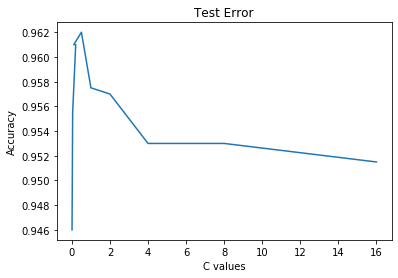

In [4]:
plt.title("Test Error")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.plot(c_values_test,accuracies_test)



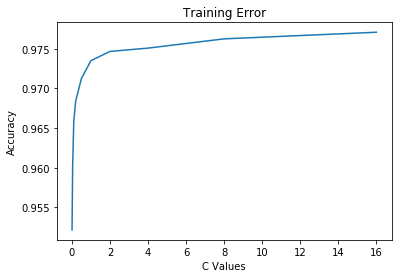

In [5]:
plt.title("Training Error")
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.plot(c_values_train,accuracies_train)

In [ ]:
from sklearn import svm

X_train_SVM = []
y_train_SVM = []
for i in range (0,6000):
    if(i >= 3000):
        X_train_SVM.append(X_train_5_7[i+3000])
        y_train_SVM.append(1)
    else:
        X_train_SVM.append(X_train_5_7[i])
        y_train_SVM.append(0)
X_test_SVM = []
y_test_SVM = []
for i in range(0,1000):
    if(i >= 500):
        X_test_SVM.append(X_test_5_7[i+500])
        y_test_SVM.append(1)
    else:
        X_test_SVM.append(X_test_5_7[i])
        y_test_SVM.append(0)
        
    
        
X_train_SVM = np.array(X_train_SVM)
y_train_SVM = np.array(y_train_SVM)
X_test_SVM = np.array(X_test_SVM)
y_test_SVM = np.array(y_test_SVM)

#SVM Linear and Gaussian 
c_vals = [32,16,8,4,2,1,0.5,0.2,0.1,0.05,0.04,0.03,0.008,0.0016]
acc_test = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
acc_train = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print("Starting on Test: ")
for i in range(0,14):
    linear_svc = svm.SVC(kernel='linear', C = c_vals[i])
    clf = linear_svc
    clf.fit(X_train_SVM,y_train_SVM)
    predicted = clf.predict(X_test_SVM)
    accuracy = accuracy_score(y_test_SVM.flatten(),predicted)
    #print(predicted)
    print(accuracy)
    acc_test[i] = accuracy
print("Comparing to Train: ")
for i in range(0,14):
    linear_svc = svm.SVC(kernel='linear', C = c_vals[i])
    clf = linear_svc
    clf.fit(X_train_SVM,y_train_SVM)
    predicted = clf.predict(X_train_SVM)
    accuracy = accuracy_score(y_train_SVM.flatten(),predicted)
    #print(predicted)
    print(accuracy)
    acc_train[i] = accuracy


Starting on Test: 
0.94
0.949
0.948
0.952
0.954
0.961
0.96
0.959
0.963
0.96
0.958
0.959
0.95
0.929
Comparing to Train: 
0.9896666666666667
0.988
0.9858333333333333
0.984
0.982
0.9793333333333333
0.978
0.974
0.9708333333333333


In [ ]:
plt.title("Test Error")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.plot(c_vals,acc_test)

In [ ]:
plt.title("Training Error")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.plot(c_vals,acc_train)

In [ ]:
from random import seed
from random import randrange
 
# Split a dataset into k folds
def cross_validation_split(dataset, folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# test cross validation split
seed(1)
dataset = X_train_5_7
folds = cross_validation_split(dataset, 6)
print(folds[0])